# Introduccion

Hoy vamos a ver una introduccion a los modelos de ML. La idea no es focalizarse en los modelos en si sino en la logica y la funcion que cumplen. En esta clase vamos a pasar por alto los detalles (y un poco las buenas practicas) para focalizarnos en las ideas que queremos presentar.

In [1]:
# vamos a usar una lista reducida de especies del arbolado de la ciudad que la extrajimos en una notebook aparte

import pandas as pd

arbolado = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/arbolado-publico-lineal/arbolado-publico-lineal-2017-2018.csv")
arbolado.head()

C:\Users\Ionatan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0


In [2]:
lista_especies = ["Photinia x fraseri", "Populus nigra","Cupressus sp."]


In [3]:
# vamos a usar solo algunas caracteristicas

data = arbolado[arbolado["nombre_cientifico"].isin(lista_especies)]
data = data[["long","lat","nombre_cientifico","diametro_altura_pecho","altura_arbol"]]

In [4]:
data

,long,lat,nombre_cientifico,diametro_altura_pecho,altura_arbol
121,-58.379340,-34.606517,Photinia x fraseri,13.0,5.0
125,-58.379330,-34.606782,Photinia x fraseri,7.0,4.0
126,-58.379353,-34.606189,Photinia x fraseri,9.0,5.0
133,-58.379353,-34.606189,Photinia x fraseri,12.0,4.0
137,-58.379353,-34.606189,Photinia x fraseri,8.0,3.0
...,...,...,...,...,...
358421,NaN,NaN,Populus nigra,32.0,9.0
360378,NaN,NaN,Photinia x fraseri,40.0,4.0
363281,NaN,NaN,Photinia x fraseri,25.0,6.0
364535,NaN,NaN,Cupressus sp.,67.0,14.0


In [5]:
import seaborn as sns

<AxesSubplot:xlabel='diametro_altura_pecho', ylabel='altura_arbol'>

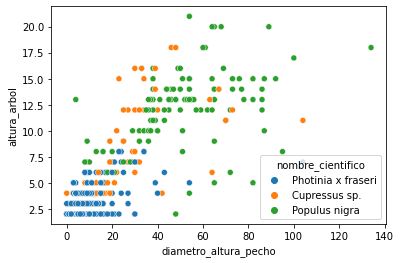

In [6]:
# Veamos que pasa con la relacion entre la altura y los diametros

sns.scatterplot(data = data, x="diametro_altura_pecho", y="altura_arbol", hue="nombre_cientifico")


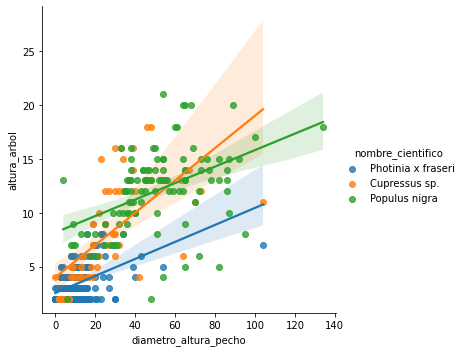

In [7]:
# veamos si podemos identificar las tendencias

sns.lmplot(data = data, x="diametro_altura_pecho", y="altura_arbol", hue="nombre_cientifico")

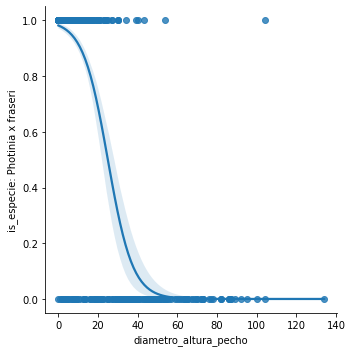

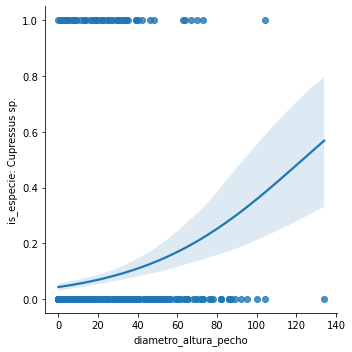

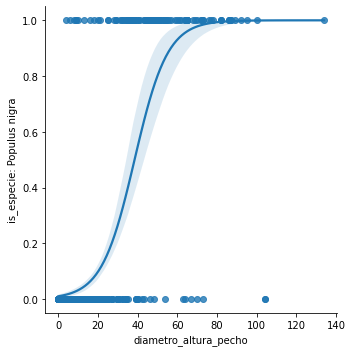

In [8]:
# Veamos ahora como funciona un modelo de regresion logistica 

for especie in data["nombre_cientifico"].unique():
    nombre = "is_especie: " + especie
    data[nombre] = data["nombre_cientifico"] == especie
    sns.lmplot(data = data, x="diametro_altura_pecho", y = nombre, logistic=True)

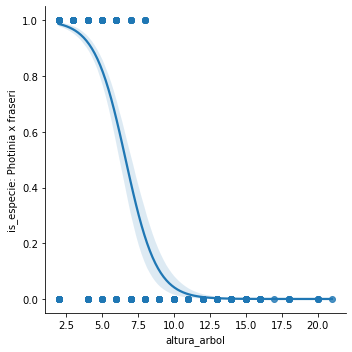

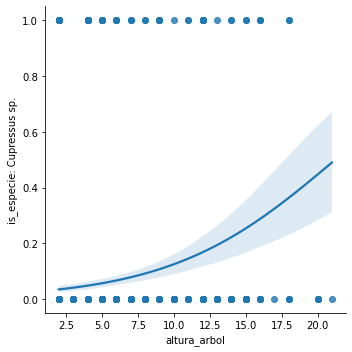

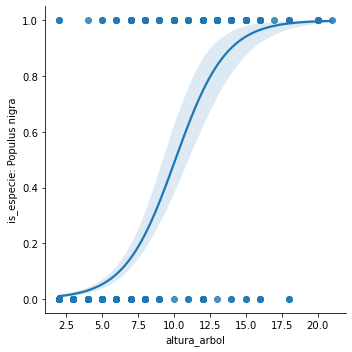

In [9]:
# Veamos ahora como funciona un modelo de regresion logistica 

for especie in data["nombre_cientifico"].unique():
    nombre = "is_especie: " + especie
    data[nombre] = data["nombre_cientifico"] == especie
    sns.lmplot(data = data, x="altura_arbol", y = nombre, logistic=True)

<AxesSubplot:xlabel='long', ylabel='lat'>

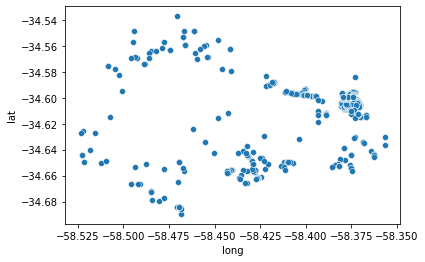

In [10]:
# Vamos a ver como funciona un clustering

# Primero vamos a ver los puntos a priori

import seaborn as sns

sns.scatterplot(data = data, y = "lat", x = "long")

In [11]:
data.isna().sum()
data = data.dropna()
data.isna().sum()

long                              0
lat                               0
nombre_cientifico                 0
diametro_altura_pecho             0
altura_arbol                      0
is_especie: Photinia x fraseri    0
is_especie: Cupressus sp.         0
is_especie: Populus nigra         0
dtype: int64

<AxesSubplot:xlabel='long', ylabel='lat'>

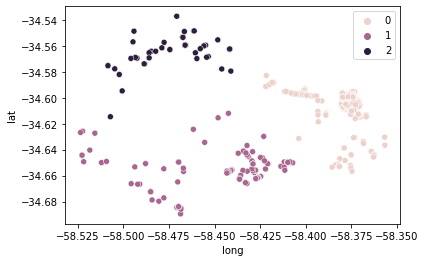

In [18]:
# Probamos como da un Kmeans con diferentes cantidades de clusters
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3,n_init=10) # Numero de repeticiones=10  #,random_state=0 # Con n=6 a veces hace una cosa a veces otra
kmeans.fit(data[["long","lat"]])
labels = kmeans.labels_ 

sns.scatterplot(data = data, x = "long", y = "lat", hue=labels)

<AxesSubplot:xlabel='long', ylabel='lat'>

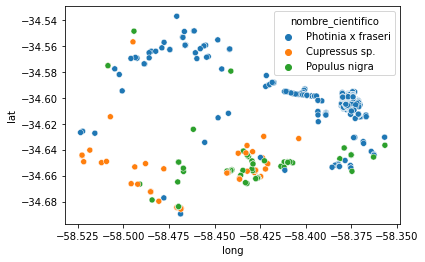

In [13]:
sns.scatterplot(data = data, x = "long", y = "lat", hue="nombre_cientifico")

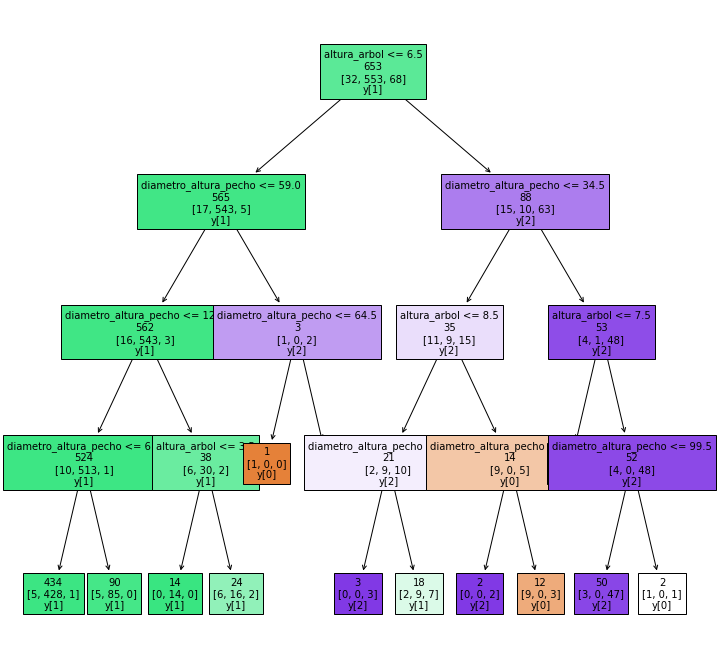

In [29]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Xtrain, Xtest, ytrain, ytest = train_test_split(data[["altura_arbol","diametro_altura_pecho"]], data["nombre_cientifico"])

tree_inst = tree.DecisionTreeClassifier(max_depth=4)

tree_inst.fit(Xtrain, ytrain)

tree_inst.tree_.node_count

#plot_tree(tree, feature_names=Xtrain.columns, filled=True, class_names=True, label=None, impurity=False) 

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(tree_inst, fontsize=10, feature_names=Xtrain.columns, filled=True, class_names=True, label=None, impurity=False)
plt.show()


In [30]:
ypred = tree_inst.predict(Xtest)
display (ypred)
display (ytest)

array(['Photinia x fraseri', 'Populus nigra', 'Photinia x fraseri',
       'Photinia x fraseri', 'Photinia x fraseri', 'Photinia x fraseri',
       'Populus nigra', 'Photinia x fraseri', 'Photinia x fraseri',
       'Photinia x fraseri', 'Photinia x fraseri', 'Photinia x fraseri',
       'Cupressus sp.', 'Photinia x fraseri', 'Photinia x fraseri',
       'Photinia x fraseri', 'Photinia x fraseri', 'Photinia x fraseri',
       'Photinia x fraseri', 'Photinia x fraseri', 'Photinia x fraseri',
       'Photinia x fraseri', 'Photinia x fraseri', 'Photinia x fraseri',
       'Populus nigra', 'Photinia x fraseri', 'Photinia x fraseri',
       'Photinia x fraseri', 'Photinia x fraseri', 'Photinia x fraseri',
       'Photinia x fraseri', 'Populus nigra', 'Photinia x fraseri',
       'Photinia x fraseri', 'Photinia x fraseri', 'Photinia x fraseri',
       'Photinia x fraseri', 'Photinia x fraseri', 'Populus nigra',
       'Photinia x fraseri', 'Photinia x fraseri', 'Photinia x fraseri',
       '

2512      Photinia x fraseri
135003         Populus nigra
3384      Photinia x fraseri
7589      Photinia x fraseri
3716      Photinia x fraseri
                 ...        
7483      Photinia x fraseri
279921    Photinia x fraseri
320883    Photinia x fraseri
5890      Photinia x fraseri
55802          Cupressus sp.
Name: nombre_cientifico, Length: 218, dtype: object

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.9128440366972477

In [32]:
subdata = data.loc[Xtest.index]

In [33]:
subdata

,long,lat,nombre_cientifico,diametro_altura_pecho,altura_arbol,is_especie: Photinia x fraseri,is_especie: Cupressus sp.,is_especie: Populus nigra
2512,-58.376890,-34.597071,Photinia x fraseri,5.0,2.0,True,False,False
135003,-58.432257,-34.666014,Populus nigra,38.0,14.0,False,False,True
3384,-58.376408,-34.607456,Photinia x fraseri,4.0,3.0,True,False,False
7589,-58.379867,-34.597877,Photinia x fraseri,7.0,3.0,True,False,False
3716,-58.373978,-34.600726,Photinia x fraseri,10.0,2.0,True,False,False
...,...,...,...,...,...,...,...,...
7483,-58.376782,-34.599587,Photinia x fraseri,4.0,3.0,True,False,False
279921,-58.457879,-34.562315,Photinia x fraseri,10.0,3.0,True,False,False
320883,-58.417846,-34.588575,Photinia x fraseri,1.0,2.0,True,False,False
5890,-58.369889,-34.614752,Photinia x fraseri,2.0,2.0,True,False,False


<AxesSubplot:xlabel='long', ylabel='lat'>

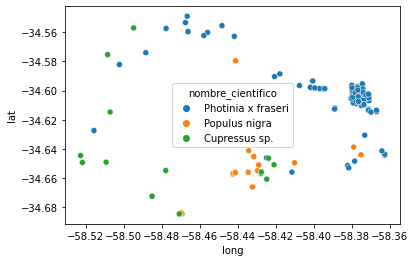

In [34]:
sns.scatterplot(data = subdata, x = "long", y = "lat", hue="nombre_cientifico")

<AxesSubplot:xlabel='long', ylabel='lat'>

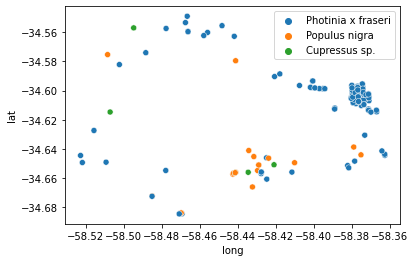

In [35]:
sns.scatterplot(data = subdata, x = "long", y = "lat", hue=ypred)

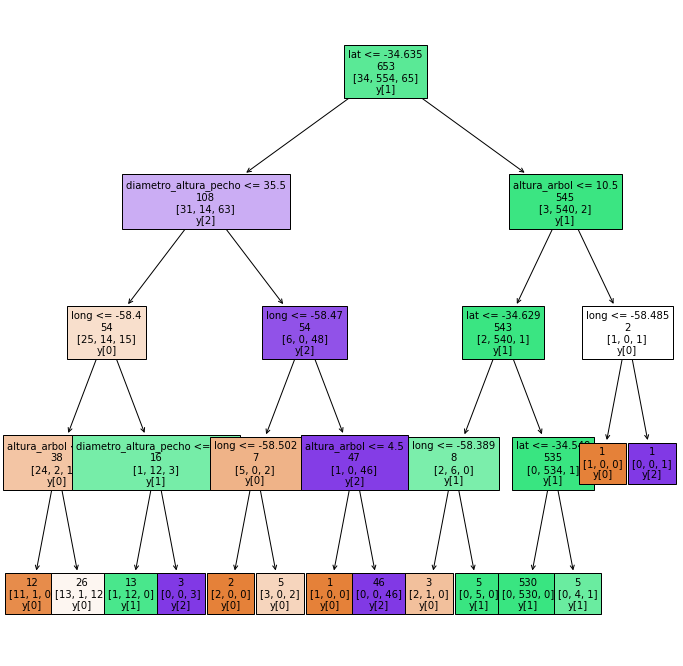

In [45]:
# Vamos a repetir usando todas las columnas


Xtrain, Xtest, ytrain, ytest = train_test_split(data[["altura_arbol","diametro_altura_pecho","long","lat"]], data["nombre_cientifico"])

tree_inst = tree.DecisionTreeClassifier(max_depth=4)

tree_inst.fit(Xtrain, ytrain)

tree_inst.tree_.node_count

#plot_tree(tree, feature_names=Xtrain.columns, filled=True, class_names=True, label=None, impurity=False) 

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(tree_inst, fontsize=10, feature_names=Xtrain.columns, filled=True, class_names=True, label=None, impurity=False)
plt.show()


In [46]:
ypred = tree_inst.predict(Xtest)
accuracy_score(ytest, ypred)

0.9541284403669725

In [47]:
subdata = data.loc[Xtest.index]

<AxesSubplot:xlabel='long', ylabel='lat'>

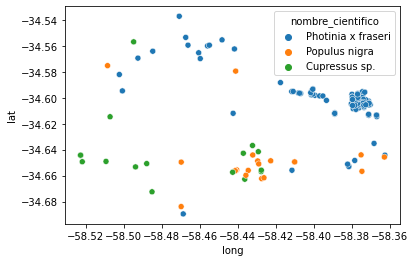

In [48]:
sns.scatterplot(data = subdata, x = "long", y = "lat", hue="nombre_cientifico")

<AxesSubplot:xlabel='long', ylabel='lat'>

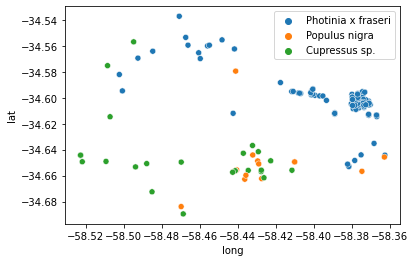

In [49]:
sns.scatterplot(data = subdata, x = "long", y = "lat", hue=ypred)